# Fundamentals of Data Analysis Tasks Notebook

Author - Sean Humphreys

---

### Contents

1. [Task 1 - Collatz Conjecture](#task-1---collatz-conjecture)
    1. [Step 1 - Test the Collatz Conjecture](#step-1---test-collatz-conjecture)
    2. [Step 2 - Test a Range of Input Values](#step-2---test-a-range-of-input-values)
    3. [Step 3 - Tell the User the Result](#step-3---tell-the-user-the-result)
    4. [Step 4 - Make the Script Re-Usable](#step-4---make-the-script-re-useable)
    5. [Task 1 References](#task-1-references)
    6. [Task 1 Background Reading](#task-1-background-reading)


2. [Task 2 - Penguins Dataset](#task-2---penguins-dataset)
    1. [Dataset Variables](#dataset-variables)
        1. [Variable Classification](#variable-classification)
        2. [Missing Values](#missing-values)
    2. [Variable Selection](#variable-selection)
    3. [Conclusion](#conclusion)
    2. [Task 2 References](#task-2-references)
    3. [Task 2 Background Reading](#task-2-background-reading)

3. [Task 3 - Penguins Probability Distribution](#task-3---penguins-probability-distribution)
    1. [Sex Variable](#sex-variable)
    2. [Island and Species Variables](#island-and-species-variable)
    3. [Numerical Variables](#numerical-variables)
        1. [Adelie Penguins](#adelie-penguins)
        2. [Chinstrap Penguins](#chinstrap-penguins)
        3. [Gentoo Penguins](#gentoo-penguins)
    1. [Task 3 References](#task-3-references)
    2. [Task 3 Background Reading](#task-3-background-reading)

## Task 1 - Collatz Conjecture <a id="task-1---collatz-conjecture"></a>
----

Task 1 - *Verify, using Python, that the conjecture is true for the first 10,000 positive integers.*

Often thought of as the simplest impossible problem the Collatz Conjecture asks whether repeating two simple arithmetic operations will eventually transform every positive integer into 1.

The mathematical expression of the Collatz Function is:

$f(n) = \begin{cases} n/2 &\text{if } n = \text{even} \\
(3n +1)/2 & \text{if } n = \text{odd} \end{cases}$


**Assumptions**
- If the Collatz conjecture for a positive integer holds true, the Collatz sequence for the number will always end in an infinite loop of 4, 2, 1 - this includes the numbers 1 and 2.
- The script should indicate to the end user if the Collatz Conjecture holds true for the desired range of positive integers.
- If the Collatz conjecture does not hold true for any values, the script should return the values that do not hold true.
- For usability purposes the script should be able to handle any range of input values not just the first 10,000 positive integers.
- The script will not run if negative integers, floating point decimals or strings are entered as arguments.
- If these values are entered as arguments the script will give clear instruction to the end user of the correct format for arguments to be entered.

### Step 1 - Test Collatz Conjecture <a id="step-1---test-collatz-conjecture"></a>

Define a function to test the Collatz conjecture. 

This function is based on a code snippet accessible at https://www.educative.io/answers/how-to-generate-the-collatz-sequence-in-python, last accessed 06/10/2023. 

The purpose of the `collatz(number)` function is to return the Collatz sequence, in a list, for a given positive integer. If the Collatz Conjecture does not hold true for that number, a list containing the given number is returned. To achieve this the Collatz sequence for the given number is tested against a list that contains the numbers 4, 2, 1 - as per the assumption that every Collatz sequence must end in a 4, 2, 1 loop.

The code snippet upon which the function is based calculates the the Collatz sequence for the number 1 as [1] and number 2 as [2, 1]. This creates an issue in so far as the sequence for the numbers 1 and 2 cannot be tested against the [4, 2, 1] loop. To allow for this, an *if* and *elif* statement are used to return the Collatz sequence for the numbers 1 and 2 that include the 4, 2, 1 loop. All other values passed as an argument to the function are divided by 2 if even or if odd they multiplied by 3 and 1 is added to this number. The returned value is appended to a list. A *while* loop is employed to continue this until the output of these mathematical operations reaches 1.

The *collatz_sequence_list* generated by the while loop is tested for Collatz compliance by comparing the last three numbers in this list against the *loop_list*. If false an *if* statement returns the *wrong_list*. If true, the function returns the *collatz_sequence_list*.

In [42]:
def collatz(number):
    collatz_sequence_list = []
    wrong_list = []
    loop_list = [4, 2, 1]
    if number == 1:
        # to test 1 the 4,2,1 loop needs to be included to test against
        collatz_sequence_list = [1, 4, 2, 1]
    elif number == 2:
        # to test 2 the 4,2,1 loop needs to be included to test against
        collatz_sequence_list = [2, 4, 2, 1]
    else:
        collatz_sequence_list.append(number)
        while (number != 1):
            if (number % 2 == 0):
                number = number//2
                collatz_sequence_list.append(number)
            else:
                number = number*3+1
                collatz_sequence_list.append(number)
    if loop_list != collatz_sequence_list[-3:]:
        wrong_list.append(collatz_sequence_list[0])
        return wrong_list
    else:
        return collatz_sequence_list

The output of the `collatz(number)` function is tested below. For the purpose of this test, number = 57.

In [43]:
print(collatz(57))

[57, 172, 86, 43, 130, 65, 196, 98, 49, 148, 74, 37, 112, 56, 28, 14, 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]


### Step 2 - Test a Range of Input Values <a id="step-2---test-a-range-of-input-values"></a>

Define a function to test a range of values. 

Using a *for* loop, every value in a given range of values can be inputted into the into the `collatz(number)` function. There are two possible outcomes that must be accounted for:
1. The number does not satisfy the Collatz conjecture. In this outcome a list 1 number long is returned.
2. The number does satisfy the Collatz conjecture. In this outcome a list longer than 1 number is returned.

Each of these outcomes is handled separately. Two functions are defined to achieve this.

1. The `wrong_list(lower, upper)` function uses a *for* loop to check the length of the list returned from the `collatz(number)` function for every value in the desired range. If the length of the returned list is 1, i.e. the Collatz conjecture does not hold true for that number, that number is appended to a list and returned by the function on completion of the *for* loop.

In [44]:
def wrong_list(lower, upper):
    wrong_list = []
    for i in range(lower, upper):
        if len(collatz(i)) == 1:
            wrong_list.append(i)
    return (wrong_list)

2. The `right_list(lower, upper)` function uses a *for* loop to check the length of the list returned from the `collatz(number)` function for every value in the desired range. If the length of the returned list is greater than 1, i.e. the Collatz conjecture is true for that number, that number is appended to a list and the returned by the function on completion of the *for* loop.

In [45]:
def right_list(lower, upper):
    right_list = []
    for i in range(lower, upper):
        if len(collatz(i)) > 1:
            right_list.append(i)
    return (right_list)

### Step 3 - Tell the User the Result <a id="step-3---tell-the-user-the-result"></a>

Define a function to tell the user the vales for which the Collatz conjecture does or does not hold true for in a given range.

The input arguments for this function are the lower and upper values for the range of values to be tested.

4 variables are defined:
1. wrong_list_var = a list containing the output of the `wrong_list(lower, upper)` function for the range of values given as arguments 
2. right_list_var = a list containing the output of the `right_list(lower, upper)` function for the range of values given as arguments 
3. string = string to be printed
4. result = list comprehension to print a list of lists without brackets

If the length of the list returned from `wrong_list(lowest_number, highest_number)` is greater than 1 the concatenated *string* and *result* variables will be printed. Else, if, the length of the list returned from `right_list(lowest_number, highest_number)` is greater than 1 a formatted string that confirms the Collatz conjecture for the given range of values to be tested is printed.

In [46]:
def result(lowest_number, highest_number):
    wrong_list_var = wrong_list(lowest_number, highest_number)
    right_list_var = right_list(lowest_number, highest_number)
    string = 'The numbers that Collatz Conjecture does not hold true for are: '
    result = ', '.join(str(item) for item in wrong_list_var)
    if len(wrong_list_var) > 0:
        print(string + result)
    elif len(right_list_var) > 0:
        print(
            f'The Collatz Conjecture holds true for the numbers from {lowest_number} up to and including {highest_number-1}.')

The `result(lowest_number, highest number)` function output is demonstrated below for the first 10,000 positive integers.

In [47]:
result(1,10001)

The Collatz Conjecture holds true for the numbers from 1 up to and including 10000.


### Step 4 - Make the Script Re-useable <a id="step-4---make-the-script-re-useable"></a>

Importing the sys library will allow for better re-useability of the script. The script can be run from the command line with the range of values to be tested passed as arguments from the command line.

In [48]:
import sys

The following variables are defined and casted to integers:
1. low_number = sys.argv[1]. sys.argv[1] is the first argument passed from the command line. This should be the start of the range to test. The risk is that the user enters a negative value, a floating point integer or a string.  
2. high_number = sys.argv[2] + 1. sys.argv[2] is the second argument passed from the command line. This should be the end of the range to be test. 1 is added to this value. The risk is that the user enters a negative value, a floating point integer, a string or a value that is lower than sys.argv[1].

To mitigate against the risks outlined above a combination of error handling, *if*, *elif* and *else* statements are used. The code contained in the *try* block will run unless a *ValueError* or an *IndexError* are caught. If this happens instructions are printed advising the user of the corrective action to take on re-run of the script. If no error is caught the `result(low_number, high_number)` function will test the range of values given as command line arguments only if the *low_number* value is a positive integer that is less than the *high_number* variable.

In [49]:
try:
    low_number = int(sys.argv[1]) # cast to int
    high_number = int(sys.argv[2]) + 1 # need to add 1 for desired range
    if low_number > 0 and low_number < high_number:
        result(low_number, high_number)
    elif low_number > 0 and high_number < low_number:
        print(f'{high_number} is lower than {low_number}. The script requires that the second argument is greater than'
              f' the first. Please run the script again with the correct parameters.')
    else:
        print(f'{low_number} is not a positive integer. Please run the script again and enter a positive integer as '
              f'an argument.')
except ValueError: # error handling
    print(f'Please enter a positive integer as an argument.')
except IndexError: # error handling
    print('Please enter two command line arguments. The arguments must be positive integers with the first number '
          f'less than the second number.')

Please enter a positive integer as an argument.


In the execution of the code above error handling is demonstrated. As the *low_number* variable is not a positive integer the *ValueError* code block is executed.  

### Task 1 References <a id="task-1-references"></a>

Educative: Interactive Courses for Software Developers. (n.d.). How to generate the Collatz sequence in Python. [online] Available at: https://www.educative.io/answers/how-to-generate-the-collatz-sequence-in-python. [accessed 06 Oct. 2023].


### Task 1 Background Reading <a id="task-1-background-reading"></a>

bobbyhadz.com. (n.d.). Print a List without the Commas and Brackets in Python | bobbyhadz. [online] Available at: https://bobbyhadz.com/blog/python-print-list-without-commas-and-brackets [Accessed 6 Oct. 2023].

Chaudhuri, D.A.K. (2020). Collatz Conjecture-the simplest impossible problem. [online] Cooking Cosmos. Available at: https://asischaudhuri.wordpress.com/2020/11/09/collatz-conjecture/ [Accessed 6 Oct. 2023].

Machine Intelligence ? (2008). LaTeX – Multiline equations, systems and matrices. [online] Available at: https://kogler.wordpress.com/2008/03/21/latex-multiline-equations-systems-and-matrices/ [Accessed 6 Oct. 2023].

www.w3schools.com. (n.d.). Python Try Except. [online] Available at: https://www.w3schools.com/python/python_try_except.asp. [Accessed 6 Oct. 2023].

---

## Task 2 - Penguins Dataset <a id="task-2---penguins-dataset"></a>
---

Task 2 - *Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables that should be used to model them in Python, explaining your rationale.*

The **Penguins** dataset contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica. The data was collected as part of the Palmer Station, Antarctica, Long-Term Ecological Research program and is also known as the Palmer Penguins dataset. The research paper on the Palmer Penguins dataset by Gorman, Williams and Fraser (2014) is available at https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081#s2.

![image 1](images/illustrations/penguins.png "Palmer Penguins")

Mednick, 2021

### Dataset Variables <a id="dataset-variables"></a>

Using *Python* the penguins dataset is imported. To do this the *Pandas* and *Seaborn* libraries are imported.

[Pandas](https://pandas.pydata.org/) is an open source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the *Python* programming language. A Pandas DataFrame is a dictionary like container for Series objects. A DataFrame is the primary Pandas data structure. Using Pandas it is possible to define variables to put the Iris dataset into Pandas DataFrames.

[Seaborn](https://seaborn.pydata.org/) is an open-source software package used for visualisation of statistical data. It is based on on *matplotlib*.

In [50]:
# import the required software libraries
import pandas as pd
import seaborn as sns
penguins = sns.load_dataset('penguins')

Conveniently, the Palmer Penguins dataset is available in *Seaborn*. Once loaded, the `info()` function can be used to inspect the dataset.

In [51]:
penguins = sns.load_dataset('penguins')

# check penguins is a pandas DataFrame
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The summary above demonstrates the class as a *Pandas* DataFrame. There are 344 rows and seven columns in the dataset. The data is a combination of objects (columns 0, 1 & 6) and 64-bit floating point numbers (columns 2, 3, 4 & 5). 64-bit datatypes allow for a hgh degree of precision. However, use of 64-bit precision comes at a cost of computational overhead as more memory is required to complete calculations on these numbers due to their size.

#### Variable Classification <a id="variable-classification"></a>

Variable classification determines the type of analysis that can be carried out on that variable. The graphic below summarises the types of data and how they can be analysed. 

![Data Summary](images/illustrations/data_categories_18102023_sh.png "Data Summary Graphic")

Summarised from Sharma, 2020

The first 5 rows of the DataFrame can be viewed using the `head()` function. This is supports data variable classification and allows an understanding of the column headers and DataFrame indexing.


In [52]:
# print the first five rows of the dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


The last 5 rows of the DataFrame can be viewed using the `tail()` function. This supports a visual inspection of the DataFrame assisting possible cleanup of the DataFrame.

In [53]:
# print the last five rows of the dataset
penguins.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


Levels of measurement tell how precisely variables are recorded (Bhandari, 2020) and are summarised as follows:

| Level             | Description                                                                   |
| :-----------      | :----------                                                                   |
| Nominal           | The data can only be categorized                                              | 
| Ordinal           | The data can be categorized and ranked                                        | 
| Interval          | The data can be categorized, ranked, and evenly spaced                        | 
| Ratio             | The data can be categorized, ranked, evenly spaced, and has a natural zero    | 

Applying variable classification and level of measurement the Penguins dataset can be summarised as follows:

| Variable          | Classification    | Type          | Python Dtype  | Unit of Measure   | Level of Measure  |
| :----------       | :----------       | :----------   | :----------   | :---------        | :---------        |
| species           | Categorical       | Nominal       | Object        | N/A               | Nominal           |
| island            | Categorical       | Nominal       | Object        | N/A               | Nominal           |
| bill_length_mm    | Numerical         | Continuous    | float$64$     | mm                | Ratio             |
| bill_depth_mm     | Numerical         | Continuous    | float$64$     | mm                | Ratio             |
| flipper_length_mm | Numerical         | Continuous    | float$64$     | mm                | Ratio             |
| body_mass_g       | Numerical         | Continuous    | float$64$     | g                 | Ratio             |
| sex               | Categorical       | Nominal       | Object        | N/A               | Nominal           |

#### Missing Values <a id="missing-values"></a>

The presence of null values in the dataset is confirmed in the "Non-Null Count" column. Columns indexed 2-6 inclusive all have null values as the *Non-Null Count* for these columns is less than $344$. The presence of missing values in any dataset is an issue in so far as it can create a lack of relatability or trustworthiness in the dataset (Kumar, 2021). Consequently, if a strategy to manage missing values during model development is not employed insight could be lost leading to incorrect results (Tamboli, 2021). To summarise the missing values the `isnull()` function is chained with the `sum()` function.

In [54]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

### Variable Selection <a id="variable-selection"></a>
The *species*, *island* and *sex* variables are categorical variable types that are nominal. The mathematical operations that can be performed on these variables for analysis are limited to counts of objects. Therefore these variables are not suitable to use as variables for modelling in python.

These variables can be inspected further using the *Pandas* `unique()` method (practicaldatascience.co.uk, 2022).

In [55]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Confirms the presence of 3 species of penguin - *Adelie, Chinstrap and Gentoo*

In [56]:
penguins["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

Confirms the presence of 3 islands - *Torgersen, Biscoe & Dream*

In [57]:
penguins['sex'].unique()

array(['Male', 'Female', nan], dtype=object)

Confirms the presence of *Male and Female*. *Nan* stands for *not a number* and is also known as a null value.

Discrete data is a finite value that can be counted as opposed to continuous data that has an infinite number of possible values that can be measured.*Bill length*, *bill depth*, *flipper length* and *body mass* are all numerical variables that are continuous (Todd, 2021).

The level of measure is ratio as the units of each of these variables have an absolute zero e.g. mass or length cannot have a negative value. These variables are classed as continuous as there is an infinite number of values between each number on their scale e.g. there are an infinite number of values between $1$mm and $2$mm and there are an infinite number of values between $1$g and $2$g. As per Sharma (2020), the mathematical operations that can be performed on continuous data include fractions and decimals.

All of the numerical data in the Penguins dataset are 64-bit floating point numbers. This is an issue, caused by limitations in the way in which Python performs floating point arithmetic (docs.python.org, n.d.). Floating point numbers are stored in memory as base 2 binary fractions. Most decimal fractions cannot be represented exactly as binary fractions. Thus decimal floating-point numbers are only approximated by the binary floating-point numbers actually stored in the machine. This has the potential to cause inaccuracies when arithmetic is performed on floating point numbers in Python. In the *Penguins* dataset *Bill length*, *bill depth*, *flipper length* and *body mass* are stored in Python as 64-bit floating point numbers. This allows for a high degree of precision and will somewhat mitigate the issue outlined above, albeit at the cost of a computational overhead due to the larger size of this datatype.


### Conclusion <a id="conclusion"></a>

Within the *Penguins* dataset *bill length*, *bill depth*, *flipper length* and *body mass* should be used to model the dataset because:
1. These variables are classified as continuous variables.
2. The level of measure for these variables is ratio.
3. Complex mathematical arithmetic can be performed on these variable types (addition, subtraction, multiplication and division).
4. Mode, median, arithmetic mean and geometric mean can be calculated on these data types.
5. Range, interquartile range, standard deviation, variance & relative standard deviation can be calculated on these variables.
6. Measures of correlation between these variables can be quantified.
7. These variables are stored as 64-bit floating point numbers which allows for a high degree of precision in turn allowing for more accurate models to be created.
8. Strategies can be adopted to manage the impact of missing values in the dataset when performing models so that the risk of incorrect results, when modelling, is minimised.

To demonstrate point 5 the python `describe()` method can be used (MungingData, 2021). Mean, median, standard deviation and interquartile percentages are calculated:

In [58]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Task 2 References <a id="task-2-references"></a>

Bhandari, P. (2020). Levels of Measurement | Nominal, Ordinal, Interval and Ratio. [online] Scribbr. Available at: https://www.scribbr.com/statistics/levels-of-measurement/. [Accessed 18 Oct. 2023].

docs.python.org. (n.d.). 15. Floating Point Arithmetic: Issues and Limitations — Python 3.10.1 documentation. [online] Available at: https://docs.python.org/3/tutorial/floatingpoint.html. [Accessed 18 Oct. 2023].

Gorman, K.B., Williams, T.D. and Fraser, W.R. (2014). Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE, 9(3), p.e90081. doi:https://doi.org/10.1371/journal.pone.0090081. [Accessed 16 Oct. 2023]

Kumar, S. (2021). Deep Dive Analysis of Missing Values in Dataset. [online] Medium. Available at: https://towardsdatascience.com/deep-dive-analysis-of-missing-values-in-dataset-b387d9de6d4b. [Accessed 18 Oct. 2023].

MungingData. (2021). Exploring DataFrames with summary and describe. [online] Available at: https://mungingdata.com/apache-spark/dataframe-summary-describe/ [Accessed 20 Oct. 2023].

PhD, G.M. (2021). Palmer penguins. [online] Gabe Mednick. Available at: https://www.gabemednick.com/post/penguin/ [Accessed 16 Oct. 2023].

practicaldatascience.co.uk. (2022). How to identify and count unique values in Pandas. [online] Available at: https://practicaldatascience.co.uk/data-science/how-to-identify-and-count-unique-values-in-pandas [Accessed 25 Oct. 2023].


Sharma, R. (2020). 4 Types of Data: Nominal, Ordinal, Discrete, Continuous. [online] upGrad blog. Available at: https://www.upgrad.com/blog/types-of-data/. [Accessed 18 Oct. 2023].

Tamboli, N. (2021). Tackling Missing Value in Dataset. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/. [Accessed 18 Oct. 2023].

Todd, S. (2021). Discrete Data vs. Continuous Data: What’s the Difference? | Inzata Analytics. [online] InZata. Available at: https://www.inzata.com/discrete-data-vs-continuous-data-whats-the-difference/.‌ [Accessed 25 Oct. 2023]

### Task 2 Background Reading <a id="task-2-background-reading"></a>

archive-beta.ics.uci.edu. (n.d.). UCI Machine Learning Repository. [online] Available at: https://archive-beta.ics.uci.edu/dataset/690/palmer+penguins-3 [Accessed 16 Oct. 2023].

allisonhorst.github.io. (n.d.). Introduction to palmerpenguins. [online] Available at: https://allisonhorst.github.io/palmerpenguins/articles/intro.html. [Accessed 16 Oct. 2023].

Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/. [Accessed 13 Oct. 2023].

seaborn (2012). seaborn: statistical data visualization — seaborn 0.9.0 documentation. [online] Pydata.org. Available at: https://seaborn.pydata.org/. [Accessed 17 Oct. 2023].

Stack Overflow. (n.d.). The real difference between float32 and float64. [online] Available at: https://stackoverflow.com/questions/43440821/the-real-difference-between-float32-and-float64 [Accessed 17 Oct. 2023].

Tsai, E. (2022). Build a Python project using Pandas and Seaborn | Eugene Tsai. [online] Medium. Available at: https://medium.com/@marvelouskgc/build-a-penguin-project-using-pandas-and-seaborn-eugene-tsai-e4b7e0b499ea [Accessed 16 Oct. 2023].

www.w3schools.com. (n.d.). Pandas DataFrame head() Method. [online] Available at: https://www.w3schools.com/python/pandas/ref_df_head.asp. [Accessed 16 Oct. 2023].

---

## Task 3 - Penguins Probability Distribution <a id="task-3---penguins-probability-distribution"></a>

**Task** - *For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.*

*"In probability theory and statistics, a [probability distribution](https://en.wikipedia.org/wiki/Probability_distribution) is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment."* (Wikipedia Contributors, 2019).

### Sex Variable <a id="sex-variable"></a>

As [previously described](#variable-classification) the sex variable in the penguins data set is a categorical data type that is nominal. Consequently, mathematical operations are limited to counts of objects. However, it is possible to use binomial probability distribution to model this variable.

*Binomial distribution is a statistical probability distribution that states the likelihood that a value will take one of two independent values under a given set of parameters or assumptions.*(Barone, 2020).
Mathematically this function is expressed as:

$P(N) = \binom{n}{N}p^N(1-p)^{n-N}$

(Numpy.org, 2021)

n = the number of trials, p = the probability of success & N = the number of successes

In Python code the syntax is `random.binomial(n, p, size=None)` where n = the number of trials, p = the probability of success & size is the number of trials of the model.

To create a random distribution model of the sex variable, using python code, a strategy to manage the null values for that variable must be employed. As [previously demonstrated](#missing-values) there are 11 missing values in the sex column. One option to manage null values is to replace the missing values with the mode for that variable.

In [59]:
# create a copy of the penguins DataFrame (pandas.pydata.org, n.d.) to remove nan values
# the reason to create a copy is in case the original DataFrame is needed later
penguins_copy = penguins.copy()

# replace nan values with the mode - Zach (2022). The model could be unreliable if null values are not managed (Tamboli, 2021) 
penguins_copy['sex'] = penguins_copy['sex'].fillna(penguins_copy['sex'].mode()[0])

# understand the number of male & female penguins in dataset for probability
penguins_copy['sex'].value_counts()


sex
Male      179
Female    165
Name: count, dtype: int64

Out of the 344 rows of data 179 of the entries are male penguins.

$\implies P = 179/344 = 0.52$


In [60]:
# import the numpy library as np
import numpy as np

In [61]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
np.random.seed(1)

sex_prob = sum(np.random.binomial(1, 0.52, 1000) == 1)/1000.

print(f'In this scenario the model indicates that the chance of successfully picking a male penguin '
      f'at random from the dataset is {sex_prob*100}%.')


In this scenario the model indicates that the chance of successfully picking a male penguin at random from the dataset is 51.6%.


In the above code:
- $n = 1$ &rarr; 1 penguin is picked from the dataset.
- $P = .52$ &rarr; is probability of picking a male penguin from the dataset.
- size = 1000 &rarr; repeat the model 1000 time.
- *== 1* &rarr; the boolean condition to successfully pick a male penguin.

A histogram of the binomial probability distribution can be created as follows

In [62]:
# import the matplotlib library used to plot the histogram
import matplotlib.pyplot as plt

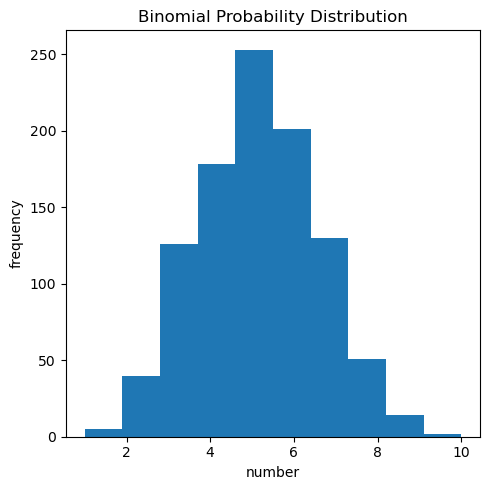

In [63]:
# result of randomly picking 10 male penguins, tested 1000 times.
male_prob_test = np.random.binomial(10, .52, 1000)

# plot histogram
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

fig, axs = plt.subplots()
axs.hist(male_prob_test, bins=10)
axs.set_title("Binomial Probability Distribution")
axs.set(xlabel='number', ylabel='frequency')
plt.show()

In the above example the resultant binomial distribution is symmetric. 

### Island and Species Variables <a id="island-and-species-variable"></a>

The [island and species variables](#variable-classification) are categorical species that are nominal. Thus, the mathematical operations that can be performed on them are limited to counts of objects. However, it is possible to use multinomial probability distribution to model this variable.

*"In probability theory, the multinomial distribution is a generalization of the binomial distribution"*, (Wikipedia, 2021). *"The term describes calculating the outcomes of experiments involving independent events which have two or more possible, defined outcomes"*, (Fern and o, n.d.).

From [previous analysis](#variable-selection) of the island and sex variable it is known that there are 3 islands (Torgersen, Biscoe & Dream) and 3 species of penguins (Adelie, Chinstrap and Gentoo). The following code can be used to model the probability of the penguin coming from a specific island or species: 

`random.multinomial(n, pvals, size=None)`. 

The arguments passed are: 
- n = the number of times to run the experiment 
- pval = the probability values (must sum to 1)
- size = the number of arrays to return.

Focusing on the Island variable specifically, apply random multinomial probability to the penguins dataset as follows:

In [64]:
# count the number of times each island occurs to calculate probability of each island being randomly selected
penguins["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [65]:
# run the random multinomial probability distribution, pvals have been bought to the lowest common denominator
island_multi_prob = np.random.multinomial(20, [21/43, 31/86, 13/86], size=1)

# assign variables to array elements
biscoe = island_multi_prob[0, 0]
dream = island_multi_prob[0, 1]
torgersen = island_multi_prob[0, 2]

# print the results
print(f'Out of 20 random tests '
      f'Torgersen was randomly selected {torgersen} times, '
      f'Biscoe was randomly selected {biscoe} times and '
      f'Dream was randomly selected {dream} times.')


Out of 20 random tests Torgersen was randomly selected 5 times, Biscoe was randomly selected 10 times and Dream was randomly selected 5 times.


### Numerical Variables <a id="numerical-variables"></a>

*Bill length*, *bill depth*, *flipper length* and *body mass* are [numerical variables](#variable-classification) that are continuous. Complex mathematical operations can be carried out on these variables. Specifically within the *Penguins* dataset all of these variables are occurring in nature. Many naturally occurring phenomena appear to be naturally distributed (Chen, 2021). Therefore it is logical to hypothesize that these variables can all be modelled using normal probability distribution.


*Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean* (Chen, 2021).

The standard distribution characteristic bell curve is illustrated below demonstrating that there is a 95.4% chance that a value will fall within 2 standard deviations of the mean. 

![Normal Distribution Curve](images/illustrations/Standard_deviation_diagram_micro.svg.png "Normal Distribution Curve")

By Ainali - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=3141713

In mathematical terms the normal distribution probability density function is expressed as:

${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$

where:
- $x$ = value of the variable or data being examined and $f(x)$ the probability function
- $\mu =$ the mean
- $\sigma =$ the standard deviation

The mean and standard deviation for the numerical variables in the *Penguins dataset* are readily available, however to create an accurate model the null values must be dealt with:

In [66]:
# use the copied DataFrame to fill na values with the median (Zach, 2022)
penguins_copy[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = penguins_copy[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(penguins_copy[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].median())

#### Adelie Penguins <a id="adelie-penguins"></a>

To test the hypothesis that the numerical variables can be modelled using Gaussian probability one can make the assumption that different species of penguin have different anatomical features. It then becomes useful to look at each species in isolation. The following example looks specifically at the *Adelie* species numerical variables.

In [67]:
# understand what index adelie ends at
print(penguins_copy['species'].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


In [68]:
# take a subset of each species
penguins_copy_adelie = penguins_copy.iloc[0:152]
penguins_copy_chinstrap = penguins_copy.iloc[152:220]
penguins_copy_gentoo = penguins_copy.iloc[220:344]

The mean and standard deviation for the variables are easily available for the standard deviation variables using the `describe()` method:

In [69]:
# assign variables
adelie_summary = penguins_copy_adelie.describe()

# validate
print(adelie_summary)

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      152.000000     152.000000         152.000000   152.000000
mean        38.828618      18.339474         190.000000  3702.960526
std          2.693957       1.215581           6.542778   457.922662
min         32.100000      15.500000         172.000000  2850.000000
25%         36.775000      17.475000         186.000000  3350.000000
50%         38.800000      18.400000         190.000000  3700.000000
75%         40.800000      19.000000         195.000000  4000.000000
max         46.000000      21.500000         210.000000  4775.000000


In [70]:
# assign mean and std to variables
adelie_bill_length_mean = adelie_summary.iloc[1, 0]
adelie_bill_length_sd = adelie_summary.iloc[2, 0]
adelie_bill_depth_mean = adelie_summary.iloc[1, 1]
adelie_bill_depth_sd = adelie_summary.iloc[2, 1]
adelie_flipper_length_mean = adelie_summary.iloc[1, 2]
adelie_flipper_length_sd = adelie_summary.iloc[2, 2]
adelie_body_mass_mean = adelie_summary.iloc[1, 3]
adelie_body_mass_sd = adelie_summary.iloc[2, 3]


The python syntax for the Gaussian distribution is:

`random.normal(loc=0.0, scale=1.0, size=None)`

- loc = mean of the distribution
- scale = standard deviation of the distribution
- size = output shape

(numpy.org, n.d.)

The normal probability distribution for each numerical variable can be modelled as follows:

In [71]:
adelie_bill_length_normal_prob_dist = np.random.normal(adelie_bill_length_mean, adelie_bill_length_sd, 1000)
adelie_bill_depth_normal_prob_dist = np.random.normal(adelie_bill_depth_mean, adelie_bill_depth_sd, 1000)
adelie_flipper_length_normal_prob_dist = np.random.normal(adelie_flipper_length_mean, adelie_flipper_length_sd, 1000)
adelie_body_mass_normal_prob_dist = np.random.normal(adelie_body_mass_mean, adelie_body_mass_sd, 1000)

The models can be compared with the actual distribution of datapoints for each variable. This is done via visual representation of the datapoints.

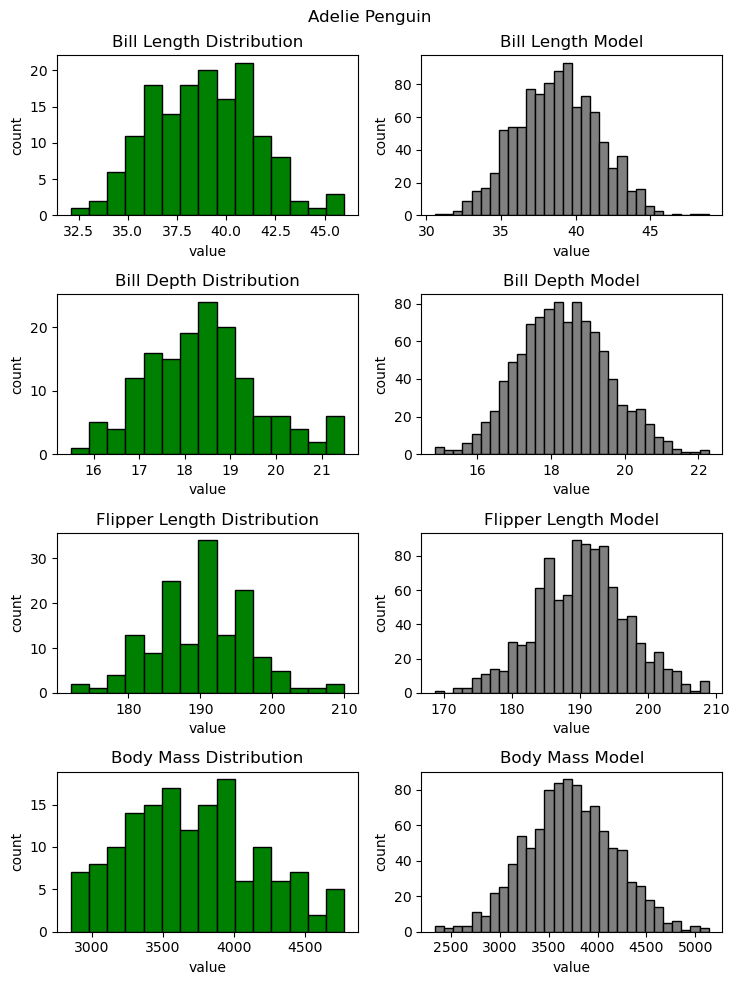

In [72]:
plt.rcParams["figure.figsize"] = [7.50, 10]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(4, 2)
axis[0, 0].hist(penguins_copy_adelie['bill_length_mm'], color = 'green', edgecolor = 'black', bins=15)
axis[0, 0].set_title("Bill Length Distribution")
axis[0, 0].set(xlabel='value', ylabel='count')
axis[0, 1].hist(adelie_bill_length_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[0, 1].set_title("Bill Length Model")
axis[0, 1].set(xlabel='value', ylabel='count')
axis[1, 0].hist(penguins_copy_adelie['bill_depth_mm'], color = 'green', edgecolor = 'black', bins=15)
axis[1, 0].set_title("Bill Depth Distribution")
axis[1, 0].set(xlabel='value', ylabel='count')
axis[1, 1].hist(adelie_bill_depth_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[1, 1].set_title("Bill Depth Model")
axis[1, 1].set(xlabel='value', ylabel='count')
axis[2, 0].hist(penguins_copy_adelie['flipper_length_mm'], color = 'green', edgecolor = 'black', bins=15)
axis[2, 0].set_title("Flipper Length Distribution")
axis[2, 0].set(xlabel='value', ylabel='count')
axis[2, 1].hist(adelie_flipper_length_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[2, 1].set_title("Flipper Length Model")
axis[2, 1].set(xlabel='value', ylabel='count')
axis[3, 0].hist(penguins_copy_adelie['body_mass_g'], color = 'green', edgecolor = 'black', bins=15)
axis[3, 0].set_title("Body Mass Distribution")
axis[3, 0].set(xlabel='value', ylabel='count')
axis[3, 1].hist(adelie_body_mass_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[3, 1].set_title("Body Mass Model")
axis[3, 1].set(xlabel='value', ylabel='count')

plt.suptitle('Adelie Penguin')
plt.tight_layout()
plt.show()

All of the randomly generated distributions (right side graphs) to a large extent mirror the real world distributions. Both datasets demonstrate that data near the mean occurs more frequently than data further away from the mean. This is less pronounced for the real world body mass distribution.

#### Chinstrap Penguins <a id="chinstrap-penguins"></a>

Employing the above methodology to test the hypothesis that the numerical variables can be modelled using Gaussian probability. The following example looks specifically at the *Chinstrap* species numerical variables.

In [73]:
# assign variables
chinstrap_summary = penguins_copy_chinstrap.describe()

# assign mean and std to variables
chinstrap_bill_length_mean = adelie_summary.iloc[1, 0]
chinstrap_bill_length_sd = adelie_summary.iloc[2, 0]
chinstrap_bill_depth_mean = adelie_summary.iloc[1, 1]
chinstrap_bill_depth_sd = adelie_summary.iloc[2, 1]
chinstrap_flipper_length_mean = adelie_summary.iloc[1, 2]
chinstrap_flipper_length_sd = adelie_summary.iloc[2, 2]
chinstrap_body_mass_mean = adelie_summary.iloc[1, 3]
chinstrap_body_mass_sd = adelie_summary.iloc[2, 3]

The normal probability distribution for each numerical variable can be modelled as follows:

In [74]:
chinstrap_bill_length_normal_prob_dist = np.random.normal(chinstrap_bill_length_mean, chinstrap_bill_length_sd, 1000)
chinstrap_bill_depth_normal_prob_dist = np.random.normal(chinstrap_bill_depth_mean, chinstrap_bill_depth_sd, 1000)
chinstrap_flipper_length_normal_prob_dist = np.random.normal(chinstrap_flipper_length_mean, chinstrap_flipper_length_sd, 1000)
chinstrap_body_mass_normal_prob_dist = np.random.normal(chinstrap_body_mass_mean, chinstrap_body_mass_sd, 1000)

The models can be compared with the actual distribution of datapoints for each variable. This is done via visual representation of the datapoints.

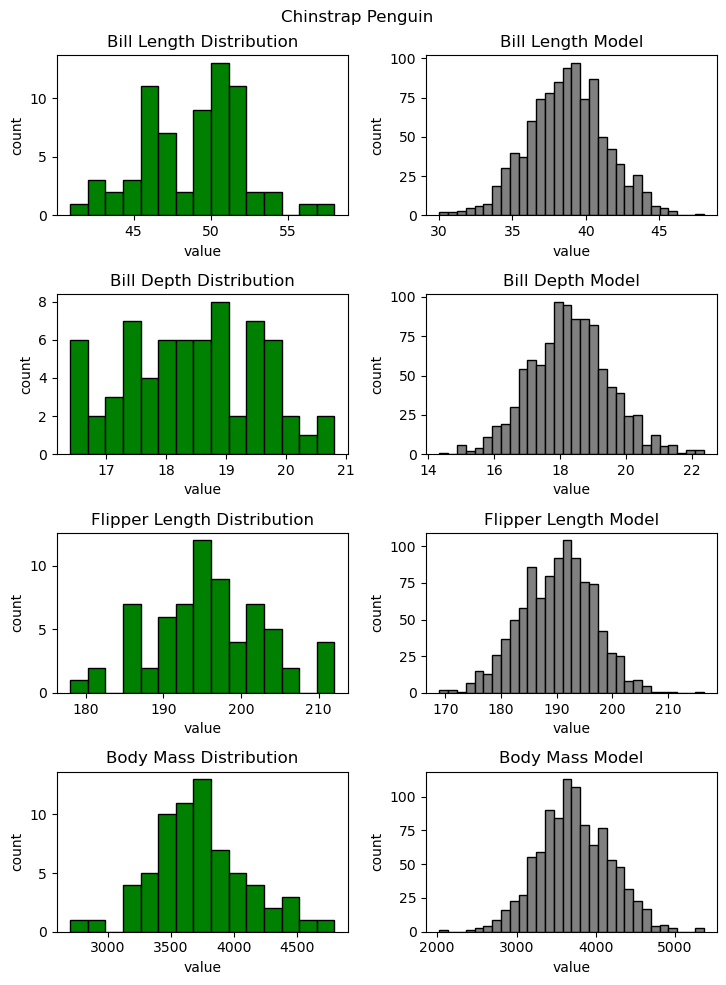

In [75]:
plt.rcParams["figure.figsize"] = [7.50, 10]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(4, 2)
axis[0, 0].hist(penguins_copy_chinstrap['bill_length_mm'], color = 'green', edgecolor = 'black', bins=15)
axis[0, 0].set_title("Bill Length Distribution")
axis[0, 0].set(xlabel='value', ylabel='count')
axis[0, 1].hist(chinstrap_bill_length_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[0, 1].set_title("Bill Length Model")
axis[0, 1].set(xlabel='value', ylabel='count')
axis[1, 0].hist(penguins_copy_chinstrap['bill_depth_mm'], color = 'green', edgecolor = 'black', bins=15)
axis[1, 0].set_title("Bill Depth Distribution")
axis[1, 0].set(xlabel='value', ylabel='count')
axis[1, 1].hist(chinstrap_bill_depth_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[1, 1].set_title("Bill Depth Model")
axis[1, 1].set(xlabel='value', ylabel='count')
axis[2, 0].hist(penguins_copy_chinstrap['flipper_length_mm'], color = 'green', edgecolor = 'black', bins=15)
axis[2, 0].set_title("Flipper Length Distribution")
axis[2, 0].set(xlabel='value', ylabel='count')
axis[2, 1].hist(chinstrap_flipper_length_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[2, 1].set_title("Flipper Length Model")
axis[2, 1].set(xlabel='value', ylabel='count')
axis[3, 0].hist(penguins_copy_chinstrap['body_mass_g'], color = 'green', edgecolor = 'black', bins=15)
axis[3, 0].set_title("Body Mass Distribution")
axis[3, 0].set(xlabel='value', ylabel='count')
axis[3, 1].hist(chinstrap_body_mass_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[3, 1].set_title("Body Mass Model")
axis[3, 1].set(xlabel='value', ylabel='count')

plt.suptitle('Chinstrap Penguin')
plt.tight_layout()
plt.show()

All of the randomly generated distributions (right side graphs) to a large extent mirror the real world distributions, apart from bill depth. Bill depth appears closer to uniform distribution than a standard distribution. Aside from bill depth, both datasets demonstrate that data near the mean occurs more frequently than data further away from the mean.

With respect to a uniform distribution any value within the given interval is equally likely to be drawn. The probability density function is expressed as:

$p(x) = \frac{1}{b - a}$

The python syntax is `random.uniform(low=0.0, high=1.0, size=None)`,  where:

- low = lower boundary of the output interval. All values generated will be greater than or equal to low. 
- high = Upper boundary of the output interval. All values generated will be less than or equal to high.
- size = output shape

Generate a uniform random distribution using the Chinstrap bill depth as follows:

In [76]:
# get high and low values
print(chinstrap_summary)

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       68.000000      68.000000          68.000000    68.000000
mean        48.833824      18.420588         195.823529  3733.088235
std          3.339256       1.135395           7.131894   384.335081
min         40.900000      16.400000         178.000000  2700.000000
25%         46.350000      17.500000         191.000000  3487.500000
50%         49.550000      18.450000         196.000000  3700.000000
75%         51.075000      19.400000         201.000000  3950.000000
max         58.000000      20.800000         212.000000  4800.000000


<function matplotlib.pyplot.show(close=None, block=None)>

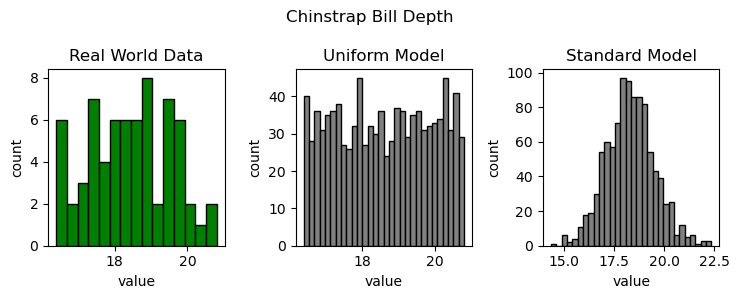

In [77]:
# assign variables
low_val = chinstrap_summary.iloc[3, 1]
high_val = chinstrap_summary.iloc[7, 1]

# generate uniform distribution
bill_depth_uniform_dist = np.random.uniform(low_val,high_val,1000)

# plot graphs
plt.rcParams["figure.figsize"] = [7.50, 3]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 3)
axis[0].hist(penguins_copy_chinstrap['bill_depth_mm'], color = 'green', edgecolor = 'black', bins=15)
axis[0].set_title("Real World Data")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(bill_depth_uniform_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[1].set_title("Uniform Model")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(chinstrap_bill_depth_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[2].set_title("Standard Model")
axis[2].set(xlabel='value', ylabel='count')

plt.suptitle('Chinstrap Bill Depth')
plt.tight_layout()
plt.show

The middle histogram, demonstrating the uniform distribution, more closely mirrors the real world dataset than the histogram on the right that demonstrates the standard distribution. In this instance it would be more appropriate to use the uniform distribution to model the Chinstrap bill depth as opposed to the standard distribution. 

#### Gentoo Penguins <a id="gentoo-penguins"></a>

Employing the above methodology to test the hypothesis that the numerical variables can be modelled using Gaussian probability. The following example looks specifically at the *Gentoo* species numerical variables.

In [78]:
# assign variables
gentoo_summary = penguins_copy_gentoo.describe()

# assign mean and std to variables
gentoo_bill_length_mean = gentoo_summary.iloc[1, 0]
gentoo_bill_length_sd = gentoo_summary.iloc[2, 0]
gentoo_bill_depth_mean = gentoo_summary.iloc[1, 1]
gentoo_bill_depth_sd = gentoo_summary.iloc[2, 1]
gentoo_flipper_length_mean = gentoo_summary.iloc[1, 2]
gentoo_flipper_length_sd = gentoo_summary.iloc[2, 2]
gentoo_body_mass_mean = gentoo_summary.iloc[1, 3]
gentoo_body_mass_sd = gentoo_summary.iloc[2, 3]

The normal probability distribution for each numerical variable can be modelled as follows:

In [79]:
gentoo_bill_length_normal_prob_dist = np.random.normal(gentoo_bill_length_mean, gentoo_bill_length_sd, 1000)
gentoo_bill_depth_normal_prob_dist = np.random.normal(gentoo_bill_depth_mean, gentoo_bill_depth_sd, 1000)
gentoo_flipper_length_normal_prob_dist = np.random.normal(gentoo_flipper_length_mean, gentoo_flipper_length_sd, 1000)
gentoo_body_mass_normal_prob_dist = np.random.normal(gentoo_body_mass_mean, gentoo_body_mass_sd, 1000)

The models can be compared with the actual distribution of datapoints for each variable. This is done via visual representation of the datapoints.

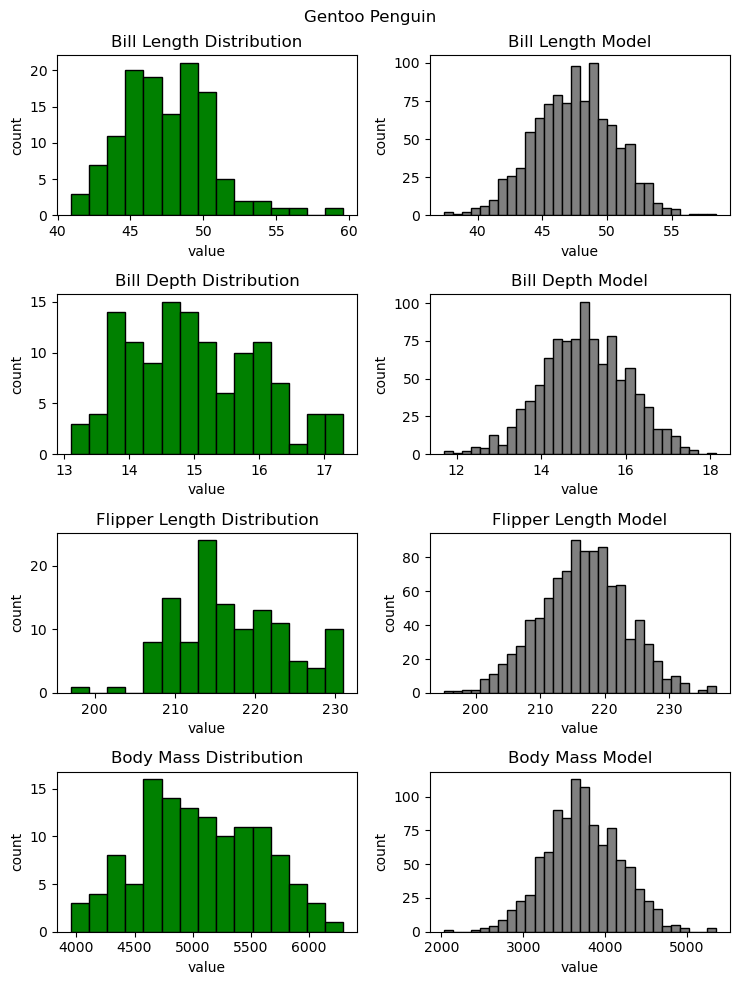

In [80]:
plt.rcParams["figure.figsize"] = [7.50, 10]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(4, 2)
axis[0, 0].hist(penguins_copy_gentoo['bill_length_mm'], color = 'green', edgecolor = 'black', bins=15)
axis[0, 0].set_title("Bill Length Distribution")
axis[0, 0].set(xlabel='value', ylabel='count')
axis[0, 1].hist(gentoo_bill_length_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[0, 1].set_title("Bill Length Model")
axis[0, 1].set(xlabel='value', ylabel='count')
axis[1, 0].hist(penguins_copy_gentoo['bill_depth_mm'], color = 'green', edgecolor = 'black', bins=15)
axis[1, 0].set_title("Bill Depth Distribution")
axis[1, 0].set(xlabel='value', ylabel='count')
axis[1, 1].hist(gentoo_bill_depth_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[1, 1].set_title("Bill Depth Model")
axis[1, 1].set(xlabel='value', ylabel='count')
axis[2, 0].hist(penguins_copy_gentoo['flipper_length_mm'], color = 'green', edgecolor = 'black', bins=15)
axis[2, 0].set_title("Flipper Length Distribution")
axis[2, 0].set(xlabel='value', ylabel='count')
axis[2, 1].hist(gentoo_flipper_length_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[2, 1].set_title("Flipper Length Model")
axis[2, 1].set(xlabel='value', ylabel='count')
axis[3, 0].hist(penguins_copy_gentoo['body_mass_g'], color = 'green', edgecolor = 'black', bins=15)
axis[3, 0].set_title("Body Mass Distribution")
axis[3, 0].set(xlabel='value', ylabel='count')
axis[3, 1].hist(chinstrap_body_mass_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[3, 1].set_title("Body Mass Model")
axis[3, 1].set(xlabel='value', ylabel='count')

plt.suptitle('Gentoo Penguin')
plt.tight_layout()
plt.show()

All of the randomly generated distributions (right side graphs) to a large extent mirror the real world distributions, apart from bill depth. Once again bill depth appears closer to uniform distribution than a standard distribution. Aside from bill depth, both datasets demonstrate that data near the mean occurs more frequently than data further away from the mean.

To test bill depth uniform random distribution: 


<function matplotlib.pyplot.show(close=None, block=None)>

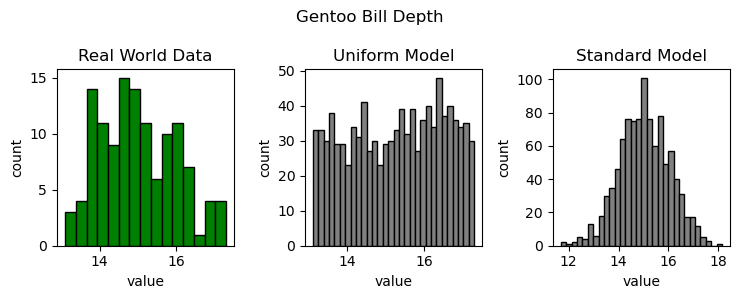

In [81]:
# assign variables
gentoo_low_val = gentoo_summary.iloc[3, 1]
gentoo_high_val = gentoo_summary.iloc[7, 1]

# generate uniform distribution
gentoo_bill_depth_uniform_dist = np.random.uniform(gentoo_low_val,gentoo_high_val,1000)

# plot graphs
plt.rcParams["figure.figsize"] = [7.50, 3]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 3)
axis[0].hist(penguins_copy_gentoo['bill_depth_mm'], color = 'green', edgecolor = 'black', bins=15)
axis[0].set_title("Real World Data")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(gentoo_bill_depth_uniform_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[1].set_title("Uniform Model")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(gentoo_bill_depth_normal_prob_dist, color = 'grey', edgecolor = 'black', bins=30)
axis[2].set_title("Standard Model")
axis[2].set(xlabel='value', ylabel='count')

plt.suptitle('Gentoo Bill Depth')
plt.tight_layout()
plt.show

The uniform distribution more closely mirrors the real world data representation than the standard distribution model.

### Conclusion <a id="conclusion"></a>

The following conclusions can be drawn:
- Binomial distribution is the most suitable probability distribution to model the sex variable.
- Multinomial distribution is the most suitable probability distribution to model the species and island variables.
- Standard probability distribution is the most suitable probability distribution to model the numerical variables with the exception of:
    
    - Chinstrap bill depth which may be better suited to uniform probability distribution for modelling due to less of a tendency to symmetrically centre around a mean value.
    - Gentoo bill depth which may be better suited to uniform probability distribution for modelling due to less of a tendency to symmetrically centre around a mean value.

### Task 3 References <a id="task-3-references"></a>

Barone, A. (2020). How Binomial Distribution Works. [online] Investopedia. Available at: https://www.investopedia.com/terms/b/binomialdistribution.asp. [Accessed 31 Oct. 2023].

Chen, J. (2021). Normal Distribution. [online] Investopedia. Available at: https://www.investopedia.com/terms/n/normaldistribution.asp. [Accessed 1 Nov. 2023].

Fern, J. and o (n.d.). What Does Multinomial Distribution Mean? [online] Investopedia. Available at: https://www.investopedia.com/terms/m/multinomial-distribution.asp. [Accessed 31 Oct. 2023].

Numpy.org. (2021). numpy.random.binomial — NumPy v1.21 Manual. [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html. [Accessed 31 Oct. 2023].

numpy.org. (n.d.). numpy.random.normal — NumPy v1.21 Manual. [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html. [Accessed 1 Nov. 2023].

pandas.pydata.org. (n.d.). pandas.DataFrame.copy — pandas 1.3.5 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html. [Accessed 31 Oct. 2023].

Tamboli, N. (2021). Tackling Missing Value in Dataset. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/. [Accessed 18 Oct. 2023].

Wikipedia. (2021). Multinomial distribution. [online] Available at: https://en.wikipedia.org/wiki/Multinomial_distribution. [Accessed 31 Oct. 2023].

Wikipedia Contributors (2019). Probability distribution. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Probability_distribution. [Accessed 25 Oct. 2023].

Zach (2022). Pandas: How to Fill NaN Values with Mode. [online] Statology. Available at: https://www.statology.org/pandas-fillna-with-mode/ [Accessed 31 Oct. 2023].

### Task 3 Background Reading <a id="task-2-background-reading"></a>

Admin (2022). Pandas Count Unique Values in Column. [online] Spark By {Examples}. Available at: https://sparkbyexamples.com/pandas/pandas-count-unique-values-in-column/. [Accessed 31 Oct. 2023].

Analytics Vidhya. (2021). What does NumPy Random Seed() do? [online] Available at: https://www.analyticsvidhya.com/blog/2021/12/what-does-numpy-random-seed-do/. [Accessed 1 Nov. 2023].

Gupta, S. (2023). Plot two or more histograms side by side in Python. [online] CodeSpeedy. Available at: https://www.codespeedy.com/plot-two-or-more-histograms-side-by-side-in-python/ [Accessed 1 Nov. 2023].

Indeed Career Guide. (n.d.). How to Calculate Probability. [online] Available at: https://www.indeed.com/career-advice/career-development/how-to-calculate-probability. [Accessed 1 Nov. 2023].

matplotlib.org. (n.d.). Creating multiple subplots using plt.subplots — Matplotlib 3.4.1 documentation. [online] Available at: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html. [Accessed 1 Nov. 2023].

numpy.org. (n.d.). numpy.random.uniform — NumPy v1.22 Manual. [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html. [Accessed 2 Nov. 2023].

Stack Overflow. (n.d.). pandas - how to plot 2 histograms side by side? [online] Available at: https://stackoverflow.com/questions/45069828/how-to-plot-2-histograms-side-by-side. [Accessed 1 Nov. 2023]

TeX - LaTeX Stack Exchange. (n.d.). \Rightarrow vs. \implies, and ‘does not imply’ symbol. [online] Available at: https://tex.stackexchange.com/questions/47063/rightarrow-vs-implies-and-does-not-imply-symbol [Accessed 1 Nov. 2023].


Third Space Learning. (n.d.). How To Calculate Probability. [online] Available at: https://thirdspacelearning.com/gcse-maths/probability/how-to-calculate-probability/. [Accessed 1 Nov. 2023].

wjgan7.github.io. (n.d.). LaTeX. [online] Available at: https://wjgan.com/posts/latex.html [Accessed 1 Nov. 2023].

www.tutorialspoint.com. (n.d.). How to plot two histograms side by side using Matplotlib? [online] Available at: https://www.tutorialspoint.com/how-to-plot-two-histograms-side-by-side-using-matplotlib [Accessed 1 Nov. 2023].

www.w3schools.com. (n.d.). NumPy Array Indexing. [online] Available at: https://www.w3schools.com/python/numpy/numpy_array_indexing.asp [Accessed 31 Oct. 2023].


---